# 图48 簇状图

簇状图可用于划分属于同一群集的点(聚类).

D:\code\platform\Deep-Learning-Framework\doc\Plot\require.py:26: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


1.23.5
2.0.0
3.7.1
0.12.2


D:\Environment\Anaconda\envs\DeepLearning\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


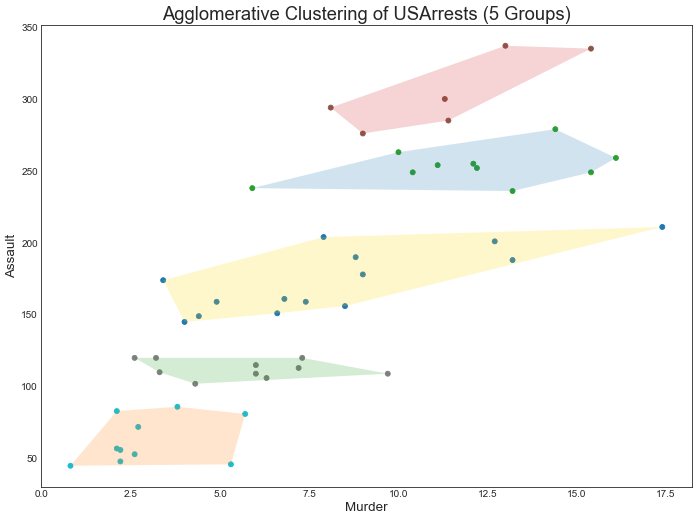

In [1]:
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial import ConvexHull
from doc.Plot.require import *

# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/USArrests.csv')
# df = pd.read_csv('../data/us_arrests.csv')

# Agglomerative Clustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(df[['Murder', 'Assault', 'UrbanPop', 'Rape']])

# Plot
plt.figure(figsize=(14, 10), dpi=60)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=cluster.labels_, cmap='tab10')


# Encircle
def encircle(x, y, ax=None, **kw):
    if not ax: ax = plt.gca()
    p = np.c_[x, y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices, :], **kw)
    ax.add_patch(poly)


# Draw polygon surrounding vertices
encircle(df.loc[cluster.labels_ == 0, 'Murder'], df.loc[cluster.labels_ == 0, 'Assault'], ec="k", fc="gold", alpha=0.2,
         linewidth=0)
encircle(df.loc[cluster.labels_ == 1, 'Murder'], df.loc[cluster.labels_ == 1, 'Assault'], ec="k", fc="tab:blue",
         alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 2, 'Murder'], df.loc[cluster.labels_ == 2, 'Assault'], ec="k", fc="tab:red",
         alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 3, 'Murder'], df.loc[cluster.labels_ == 3, 'Assault'], ec="k", fc="tab:green",
         alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 4, 'Murder'], df.loc[cluster.labels_ == 4, 'Assault'], ec="k", fc="tab:orange",
         alpha=0.2, linewidth=0)

# Decorations
plt.xlabel('Murder');
plt.xticks(fontsize=12)
plt.ylabel('Assault');
plt.yticks(fontsize=12)
plt.title('Agglomerative Clustering of USArrests (5 Groups)', fontsize=22)

plt.show()